# Регулярные выражения

Регулярное выражение — это строка, задающая шаблон поиска подстрок в тексте. Одному шаблону может соответствовать много разных строчек. 

Термин «Регулярные выражения» является переводом английского словосочетания «Regular expressions». 

Регулярное выражение, или коротко «регулярка», состоит из обычных символов и специальных командных последовательностей. Например, `\d` задаёт любую цифру, а `\d+` — задает любую последовательность из одной или более цифр. Работа с регулярками реализована во всех современных языках программирования. Однако существует несколько «диалектов», поэтому функционал регулярных выражений может различаться от языка к языку.

## Когда могут быть необходимы

Мы можем написать нужный нам шаблон (регулярку) и таким образом искать, а затем работать с найденными подстроками: изменять, заменять и т.д.

## Примеры регулярных выражений

| Пример | Подходящие тексты                   |
|--------|-------------------------------------|
| м.л.ко | "молоко", "малако", "м4леко" и т.д. |
| \d{4}  | "9867", "1234", "4322" и т.д.       |

## Основы синтаксиса

Любая строка сама по себе является регулярным выражением. 

Так, выражению `Хаха` будет соответствовать строка `Хаха` и только она. 

Регулярные выражения являются регистрозависимыми, поэтому строка `хаха` (с маленькой буквы) уже не будет соответствовать выражению выше. Подобно строкам в языке Python, регулярные выражения имеют спецсимволы `.^$*+?{}[]\|()`, которые в регулярках являются управляющими конструкциями.

## Спецсимволы и управляющие конструкции

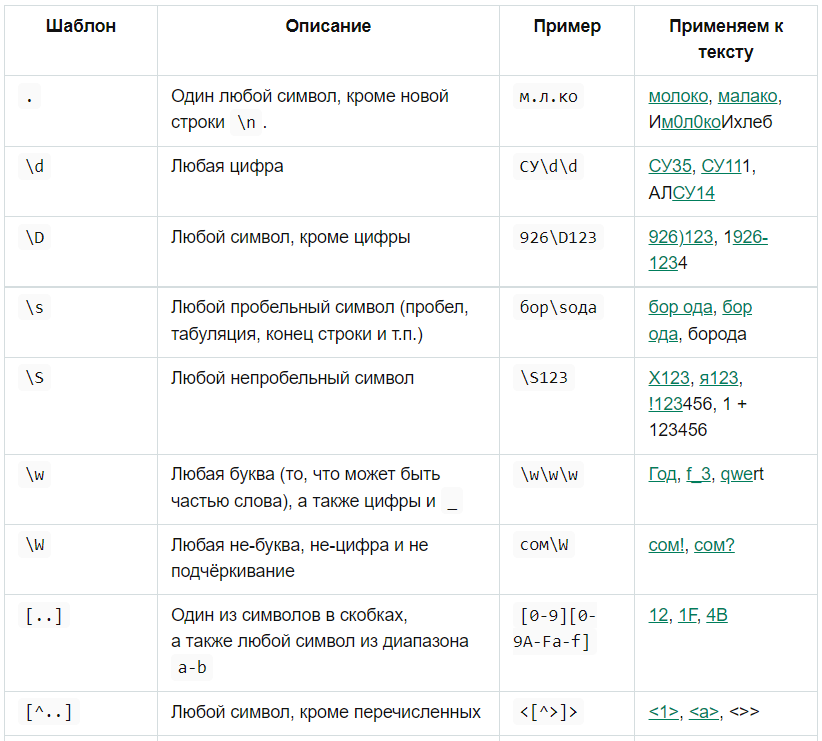

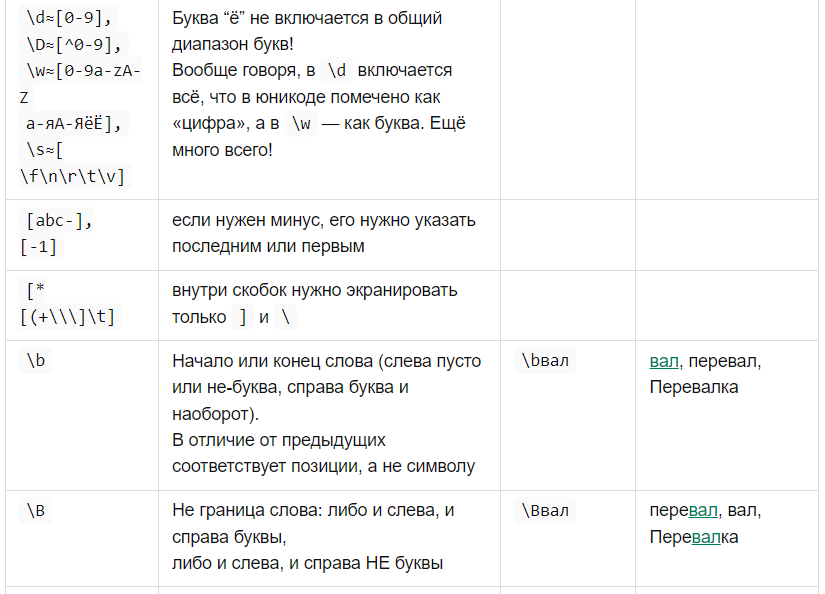

## Квантификаторы (указатели количества повторений)

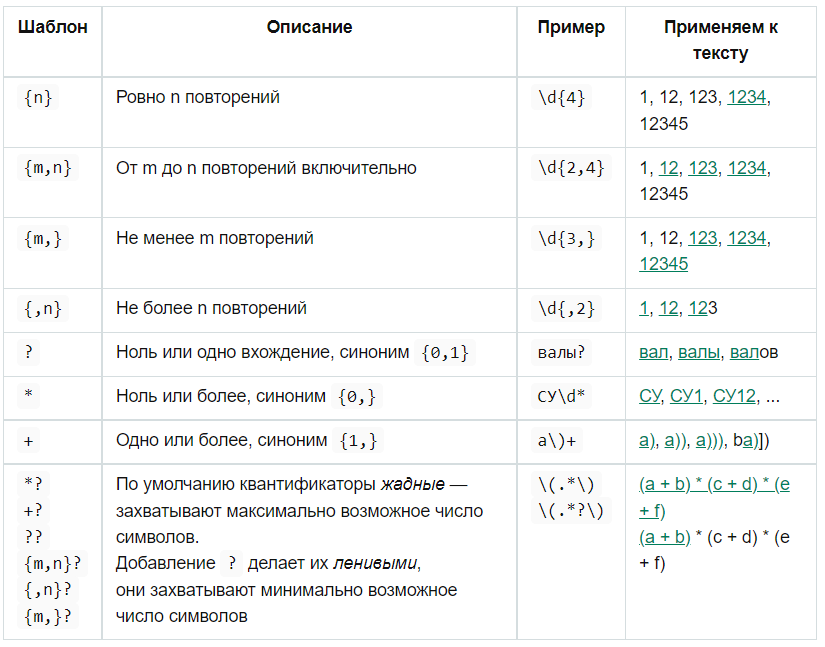

## Экранирование специальных символов

Если есть необходимость найти в тексте именно специальные символы (`.^$*+?{}[]\|()`) как части строки, а не использовать как специальный символ регулярных выражений, их необходимо *экранировать*:

* `\.` - будет соответствовать обычному символу "точка";
* `\{\}` - будет соответствовать последовательности символов {}, а не использоваться как часть квантификатора;
* и т.д.

## Регулярные выражения в Python

Для работы с регулярными выражениями в ЯП Python есть встроенный модуль `re`.

In [ ]:
import re

### Доступные функции

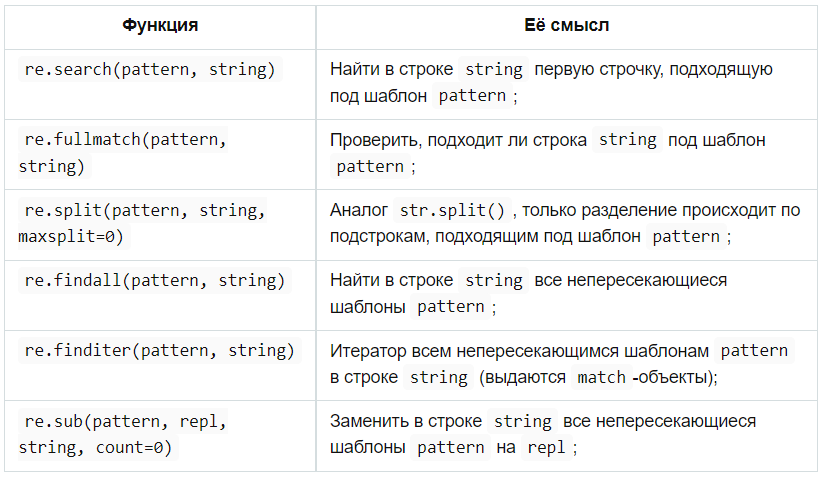

### `search`

Чтобы найти подстроку по некоторому шаблону, можно использовать функцию `search`.

**NB**: Если под шаблон подходят несколько подстрок, только *первая* из них будет возвращена.

In [ ]:
text = 'Телефон 123-12-12'
regexp = r'\d\d\D\d\d'

match = re.search(regexp, text) 
print(match[0] if match else 'Not found') 

23-12


In [3]:
text = 'Телефон 1231212'

match = re.search(regexp, text) 
print(match[0] if match else 'Not found') 

NameError: name 'regexp' is not defined

### `fullmatch`

Чтобы проверить соответствие некоторой строки некоторому шаблону, можно использовать функцию `fullmatch`.

In [ ]:
text = '12-12'
regexp = r'\d\d\D\d\d'

match = re.fullmatch(regexp, text) 
print('YES' if match else 'NO')

YES


In [ ]:
text = 'Т. 12-12'

match = re.fullmatch(r'\d\d\D\d\d', text) 
print('YES' if match else 'NO')

NO


### `split`

Чтобы разделить строку по некоторому шаблону, можно использовать функцию `split`.

In [ ]:
text = 'Где, скажите мне, мои очки??!'
regexp = r'\W+'

result = re.split(regexp, text)
print(result)

['Где', 'скажите', 'мне', 'мои', 'очки', '']


### `findall`

Чтоыб найти все подстроки по некоторому шаблону, можно использовать функцию `findall`.

In [ ]:
text = 'Эта строка написана 04.01.2022, а могла бы и 12.12.2021'
regexp = r'\d\d\.\d\d\.\d{4}'

result = re.findall(regexp, text)
print(result)

['04.01.2022', '12.12.2021']


### `finditer`

Чтобы найти все подстроки по некоторому шаблону и использовать их в *итераторе*, можно использовать функцию `finditer`.

In [ ]:
text = 'Эта строка написана 04.01.2022, а могла бы и 12.12.2021'
regexp = r'\d\d\.\d\d\.\d{4}'

for m in re.finditer(regexp, text): 
    print('Дата', m[0], 'начинается с позиции', m.start())

Дата 04.01.2022 начинается с позиции 20
Дата 12.12.2021 начинается с позиции 45


### `sub`

Чтобы заменить подстроки по некоторому шаблону, можно использовать функцию `sub`.

In [ ]:
text = 'Эта строка написана 04.01.2022, а могла бы и 12.12.2021'
regexp = r'\d\d\.\d\d\.\d{4}'
replacement = 'DD.MM.YYYY'

result = re.sub(regexp, replacement, text)
print(result)

Эта строка написана DD.MM.YYYY, а могла бы и DD.MM.YYYY


### Объект типа `Match`

Возвращаемым значением большинства функций модуля `re` является специальный объект типа `Match`.

Этот объект содержит информацию о заданном шаблоне, тексте и результате поиска.

In [ ]:
text = 'Телефон 123-12-12'
regexp = r'\d\d\D\d\d'

match = re.search(regexp, text) 
print(match)

<re.Match object; span=(9, 14), match='23-12'>


In [ ]:
# Строка, по которой происходил поиск
print(match.string)

Телефон 123-12-12


In [ ]:
# Кортеж с начальной и конечной позициями найденной подстроки 
print(match.span())

(9, 14)


In [ ]:
# Найденная подстрока
print(match.group())

23-12


## Плохой пример регулярных выражений

Для проверки правильности e-mail адреса может использоваться следующее регулярное выражение:

```(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|
2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])```

Однако, поддерживать и разбираться в нём после написания почти невозможно. 

Регулярные выражения - не лекарство от всех болезней! Они должны быть (желательно) короткими и максимально понятными.


## Задачи

1. Найдите все «слова», написанные капсом (то есть строго заглавными), возможно внутри настоящих слов;
1. Найдите слова, в которых есть русская буква, а когда-нибудь за ней цифра;
1. Найдите все слова, начинающиеся с русской или латинской большой буквы;
1. Найдите слова, которые начинаются на гласную;
1. Найдите строчки, в которых есть символ `*`;
1. Найдите строчки, в которых есть открывающая и когда-нибудь потом закрывающая скобки.

### Найдите все «слова», написанные капсом (то есть строго заглавными), возможно внутри настоящих слов

In [22]:
import re

string = 'привет ПРИВЕТ БИБА боба ылыра'
pattern = r'[А-Я]'
regexp = r'\W+'
results = re.split(regexp, string)
for result in results:
    print(''.join(re.findall(pattern, result)))


ПРИВЕТ
БИБА




### Найдите слова, в которых есть русская буква, а когда-нибудь за ней цифра

In [27]:
import re

string = 'пр1ивет1 ПРИВЕТ1 БИБА б1оба ылыра'
pattern = r'[А-я]\d'
regexp = r'\W+'
results = re.split(regexp, string)
for result in results:
    if ''.join(re.findall(pattern, result)):
        print(result)

пр1ивет1
ПРИВЕТ1
б1оба


### Найдите все слова, начинающиеся с русской или латинской большой буквы

In [35]:
import re

string = 'пр1ивет1 ПРИВЕТ1 БИБА б1оба ылыра фыв ФЫ AAAANN asnna Ans'
pattern_latin = r'[A-Z]'
pattern_rus = r'[А-Я]'
regexp = r'\W+'
results = re.split(regexp, string)
for result in results:
    if re.findall(pattern_latin, result[0]) or re.findall(pattern_rus, result[0]):
        print(result)

ПРИВЕТ1
БИБА
ФЫ
AAAANN
Ans


### Найдите слова, которые начинаются на гласную

In [37]:
import re

string = 'пр1ивет1 ПРИВЕТ1 БИБА б1оба ылыра фыв ФЫ AAAANN asnna Ans ааа приает у ы'
pattern = r'[АаИиЕеОоУуЫыЭэЮюЯя]'
regexp = r'\W+'
results = re.split(regexp, string)
for result in results:
    if re.findall(pattern, result[0]):
        print(result)

ылыра
ааа
у
ы


### Найдите строчки, в которых есть символ `*`

In [74]:
import re

string = 'п*р1ивет1 ПРИВЕТ1 БИБА б1оба ылыра фыв ФЫ AAAANN asnna Ans ааа приает у ы ** s*s .s.s..s. .s...'
pattern = r'\.'
regexp = r'\W+'
results = re.split(regexp, string)
for result in results:
    if len(result) > 0:
        if re.findall(pattern, result[0]):
            print(result)

### Найдите строчки, в которых есть открывающая и когда-нибудь потом закрывающая скобки

## Использованные и полезные ресурсы

* https://habr.com/ru/post/349860/
* https://regex101.com/
* https://docs.python.org/3/library/re.html
* https://www.w3schools.com/python/python_regex.asp